In [ ]:
import zipfile
import os

# Path to the zip file and the destination directory
zip_file_path = '/content/archive.zip'
destination_directory = '/content/unzipped_folder'  # Destination folder

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)

print(f'Files extracted to: {destination_directory}')


Files extracted to: /content/unzipped_folder


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to your dataset directories
train_dir = '/content/unzipped_folder/data/train'
val_dir = '/content/unzipped_folder/data/val'

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values
    rotation_range=15,            # Random rotation
    width_shift_range=0.1,        # Random width shift
    height_shift_range=0.1,       # Random height shift
    zoom_range=0.1,               # Random zoom
    horizontal_flip=True          # Random horizontal flip
)

val_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for validation, only rescaling

# Load the training images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),       # Resize all images to 224x224
    batch_size=32,                # Set the batch size
    class_mode='categorical'      # Use categorical labels
)

# Load the validation images
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),       # Resize all images to 224x224
    batch_size=32,                # Set the batch size
    class_mode='categorical'      # Use categorical labels
)

Found 33984 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.


Checking for the count of images in each folders

In [ ]:
import os

# Paths to your dataset directories
train_dir = '/content/unzipped_folder/data/train'
val_dir = '/content/unzipped_folder/data/val'

# Function to count files in each class folder
def count_images_in_classes(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            count = len(os.listdir(class_path))
            class_counts[class_name] = count
    return class_counts

# Count images in the training set
train_class_counts = count_images_in_classes(train_dir)
print("Training Set Image Counts: ", train_class_counts)

# Count images in the validation set
val_class_counts = count_images_in_classes(val_dir)
print("Validation Set Image Counts: ", val_class_counts)

Training Set Image Counts:  {'NonDemented': 9600, 'ModerateDemented': 6464, 'MildDemented': 8960, 'VeryMildDemented': 8960}
Validation Set Image Counts:  {'NonDemented': 3200, 'ModerateDemented': 64, 'MildDemented': 896, 'VeryMildDemented': 2240}


Checking for corrupt images in both the train and val folder

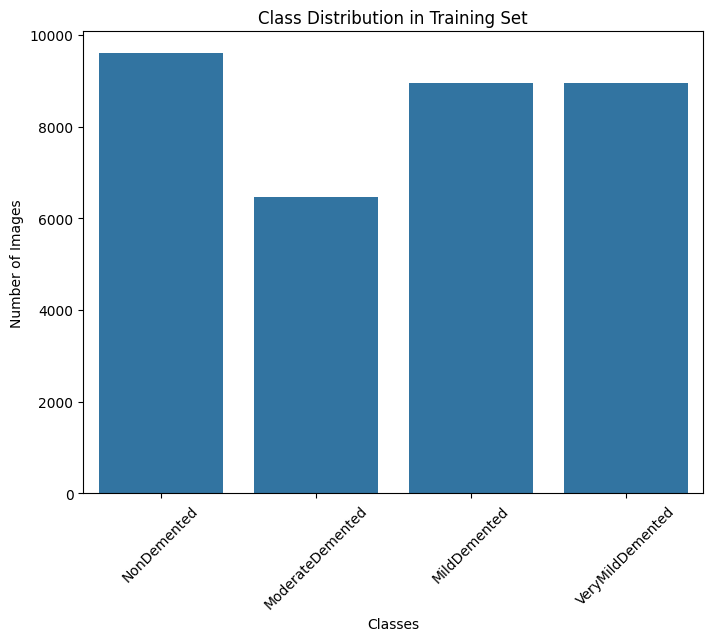

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Get the class distribution in the training set
class_counts = {}
for class_name in os.listdir(train_dir):
    class_folder = os.path.join(train_dir, class_name)
    if os.path.isdir(class_folder):
        class_counts[class_name] = len(os.listdir(class_folder))

# Plot class distribution
plt.figure(figsize=(8,6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title('Class Distribution in Training Set')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

Visualize Sample Images from Each Class

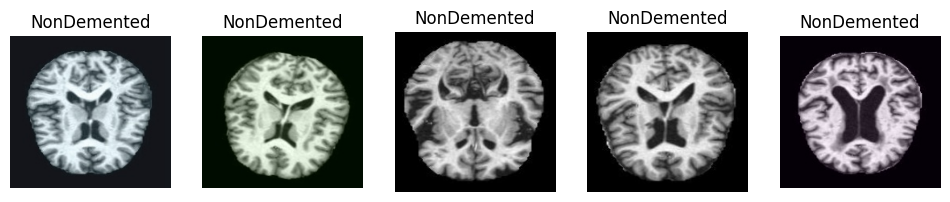

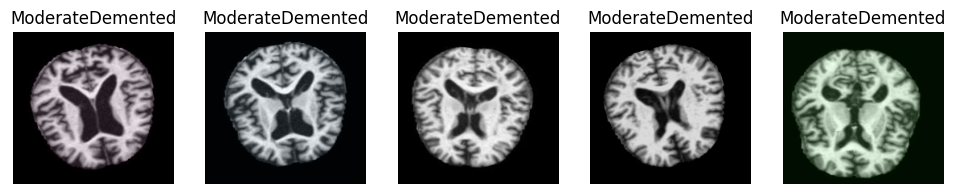

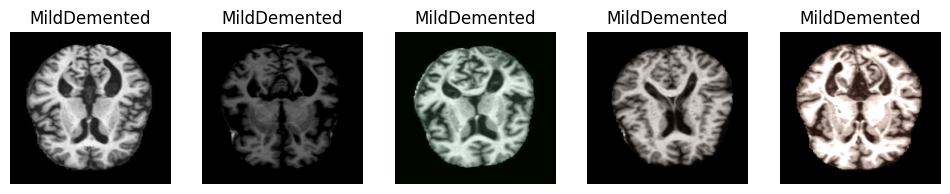

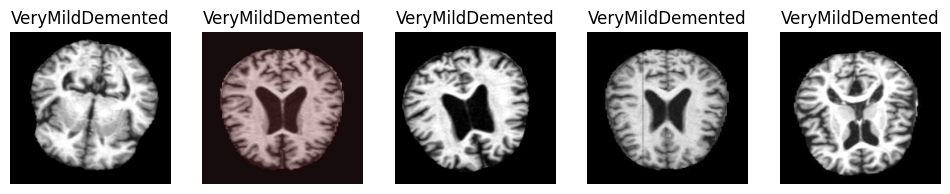

In [ ]:
import random
from PIL import Image

def show_random_images(directory, class_name, num_images=5):
    class_path = os.path.join(directory, class_name)
    image_files = os.listdir(class_path)
    random_images = random.sample(image_files, num_images)

    plt.figure(figsize=(12,6))
    for i, img_file in enumerate(random_images):
        img_path = os.path.join(class_path, img_file)
        img = Image.open(img_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.show()

# Show random images for each class
for class_name in os.listdir(train_dir):
    show_random_images(train_dir, class_name)

Image Shape and Size

In [ ]:
def check_image_shapes(directory):
    shapes = {}
    for class_name in os.listdir(directory):
        class_folder = os.path.join(directory, class_name)
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            img = Image.open(img_path)
            if img.size not in shapes:
                shapes[img.size] = 1
            else:
                shapes[img.size] += 1
    return shapes

# Analyze image shapes in the training directory
shapes = check_image_shapes(train_dir)
print("Image Shapes and their frequencies: ", shapes)

Image Shapes and their frequencies:  {(200, 190): 27584, (180, 180): 6400}


Pixel Intensity Distribution

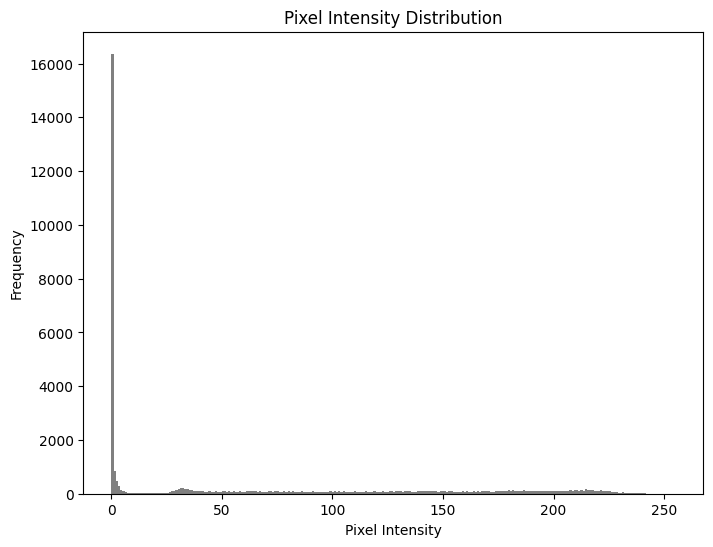

In [ ]:
import numpy as np

def plot_pixel_distribution(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img_array = np.array(img)

    plt.figure(figsize=(8,6))
    plt.hist(img_array.flatten(), bins=256, range=(0, 255), color='gray')
    plt.title('Pixel Intensity Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Plot pixel intensity distribution for a random image
random_class = random.choice(os.listdir(train_dir))
random_image = random.choice(os.listdir(os.path.join(train_dir, random_class)))
plot_pixel_distribution(os.path.join(train_dir, random_class, random_image))

Check Image Channels (RGB or Grayscale)

In [ ]:
def check_image_channels(directory):
    channels = {}
    for class_name in os.listdir(directory):
        class_folder = os.path.join(directory, class_name)
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            img = Image.open(img_path)
            img_channels = len(img.getbands())  # Get the number of channels
            if img_channels not in channels:
                channels[img_channels] = 1
            else:
                channels[img_channels] += 1
    return channels

# Check number of channels (1 for grayscale, 3 for RGB)
image_channels = check_image_channels(train_dir)
print("Image Channels and their frequencies: ", image_channels)

Image Channels and their frequencies:  {3: 33984}


Checking for corrupt Images

In [ ]:
import os
from PIL import Image

# Function to detect corrupt images and count them
def check_images(directory):
    corrupt_images = 0  # Initialize a counter for corrupt images
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                img = Image.open(file_path)  # Try opening the image
                img.verify()  # Verify the image is readable
            except (IOError, SyntaxError) as e:
                print(f"Corrupt image detected: {file_path}")
                corrupt_images += 1  # Increment the counter for corrupt images
    return corrupt_images

# Check the training directory
corrupt_train_count = check_images(train_dir)
print(f"Total corrupt images in training set: {corrupt_train_count}")

# Check the validation directory
corrupt_val_count = check_images(val_dir)
print(f"Total corrupt images in validation set: {corrupt_val_count}")

Total corrupt images in training set: 0
Total corrupt images in validation set: 0


2. Noise Reduction
Purpose: Remove noise from MRI images while preserving structural details. This improves the quality of the images and enhances the model’s ability to learn from them.

In [ ]:
import cv2
import os

def apply_gaussian_filter(image_path):
    image = cv2.imread(image_path)
    filtered_image = cv2.GaussianBlur(image, (5, 5), 0)  # Apply Gaussian filter
    return filtered_image

def apply_filter_to_directory(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for subdir, dirs, files in os.walk(input_dir):
        for file in files:
            file_path = os.path.join(subdir, file)
            output_path = os.path.join(output_dir, os.path.relpath(file_path, input_dir))

            if not os.path.exists(os.path.dirname(output_path)):
                os.makedirs(os.path.dirname(output_path))

            # Apply Gaussian filter and save the new image
            filtered_image = apply_gaussian_filter(file_path)
            cv2.imwrite(output_path, filtered_image)

# Apply noise reduction on the dataset
apply_filter_to_directory(train_dir, '/content/filtered_train')
apply_filter_to_directory(val_dir, '/content/filtered_val')

3. Data Preprocessing (Normalization and Resizing)
Purpose: Prepare the dataset for the model by normalizing pixel values and resizing images to the input size expected by CNN models (224x224 for models like VGG16 or ResNet).

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,               # Normalization: Scale pixel values to [0, 1]
    rotation_range=0,              # No augmentation at this stage
    width_shift_range=0,
    height_shift_range=0,
    zoom_range=0,
    horizontal_flip=False
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Normalization only for validation

# Define generators for preprocessed images (filtered with Gaussian)
train_generator = train_datagen.flow_from_directory(
    '/content/filtered_train',     # Path to Gaussian filtered images
    target_size=(224, 224),        # Resizing to 224x224
    batch_size=32,
    class_mode='categorical'       # Multi-class classification
)

val_generator = val_datagen.flow_from_directory(
    '/content/filtered_val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 33984 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.


4. Data Augmentation
Purpose: Enhance model generalization by generating diverse transformations of the images (rotation, flipping, scaling, contrast adjustments). This step increases the effective size of the training data.

In [ ]:
# Data augmentation for training data
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,                # Normalization: Scale pixel values to [0, 1]
    rotation_range=15,              # Random rotations by 15 degrees
    width_shift_range=0.1,          # Horizontal shifts by 10%
    height_shift_range=0.1,         # Vertical shifts by 10%
    zoom_range=0.1,                 # Zoom in/out by 10%
    horizontal_flip=True,           # Random horizontal flip
    brightness_range=[0.8, 1.2]     # Contrast adjustment (brightness variation)
)

# Updated training generator with augmentation
train_generator_augmented = train_datagen_augmented.flow_from_directory(
    '/content/filtered_train',     # Path to Gaussian filtered images
    target_size=(224, 224),        # Resizing to 224x224
    batch_size=32,
    class_mode='categorical'       # Multi-class classification
)

# Validation generator without augmentation (just rescaling)
val_generator = val_datagen.flow_from_directory(
    '/content/filtered_val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 33984 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.


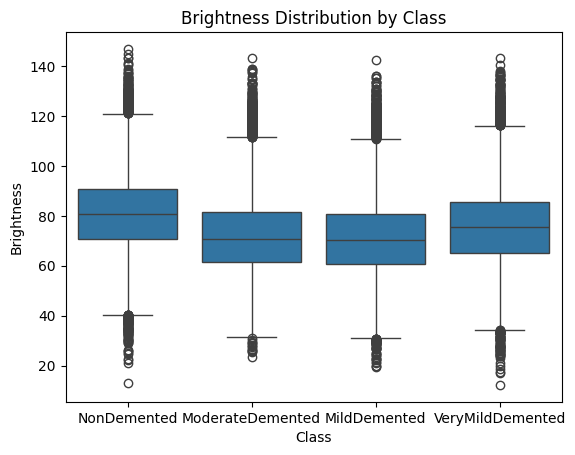

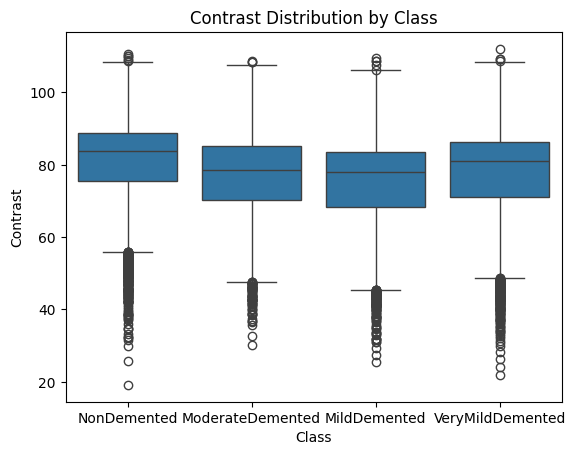

Correlation between Brightness and Contrast:
            Brightness  Contrast
Brightness    1.000000  0.628757
Contrast      0.628757  1.000000


In [ ]:
import numpy as np
from PIL import Image

def calculate_brightness_contrast(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img_array = np.array(img)

    brightness = np.mean(img_array)  # Mean pixel intensity
    contrast = np.std(img_array)     # Standard deviation of pixel intensity

    return brightness, contrast

# Iterate through the dataset and calculate brightness/contrast for each image
brightness_contrast_data = []

for class_name in os.listdir(train_dir):
    class_folder = os.path.join(train_dir, class_name)
    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)
        brightness, contrast = calculate_brightness_contrast(img_path)
        brightness_contrast_data.append([class_name, brightness, contrast])

# Convert to a DataFrame for analysis
import pandas as pd
df = pd.DataFrame(brightness_contrast_data, columns=['Class', 'Brightness', 'Contrast'])

# Visualize brightness and contrast per class
sns.boxplot(x='Class', y='Brightness', data=df)
plt.title('Brightness Distribution by Class')
plt.show()

sns.boxplot(x='Class', y='Contrast', data=df)
plt.title('Contrast Distribution by Class')
plt.show()

# Check for correlation between brightness and contrast
correlation = df[['Brightness', 'Contrast']].corr()
print("Correlation between Brightness and Contrast:")
print(correlation)

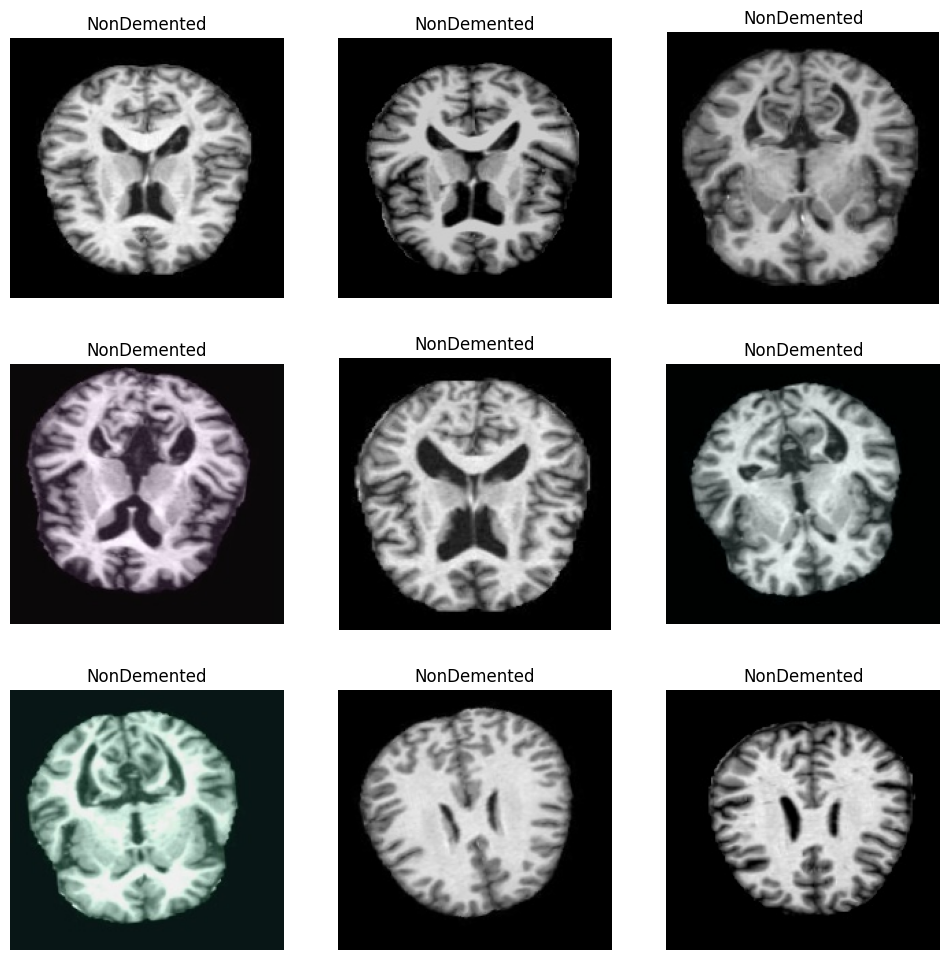

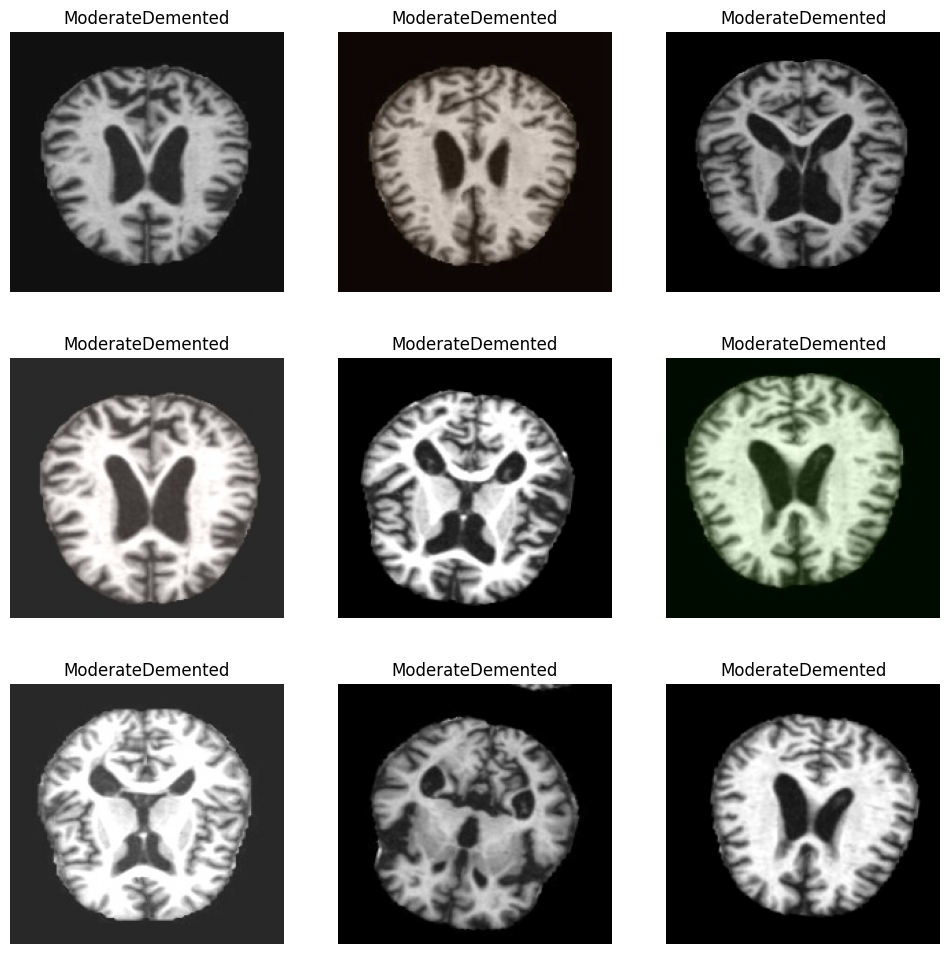

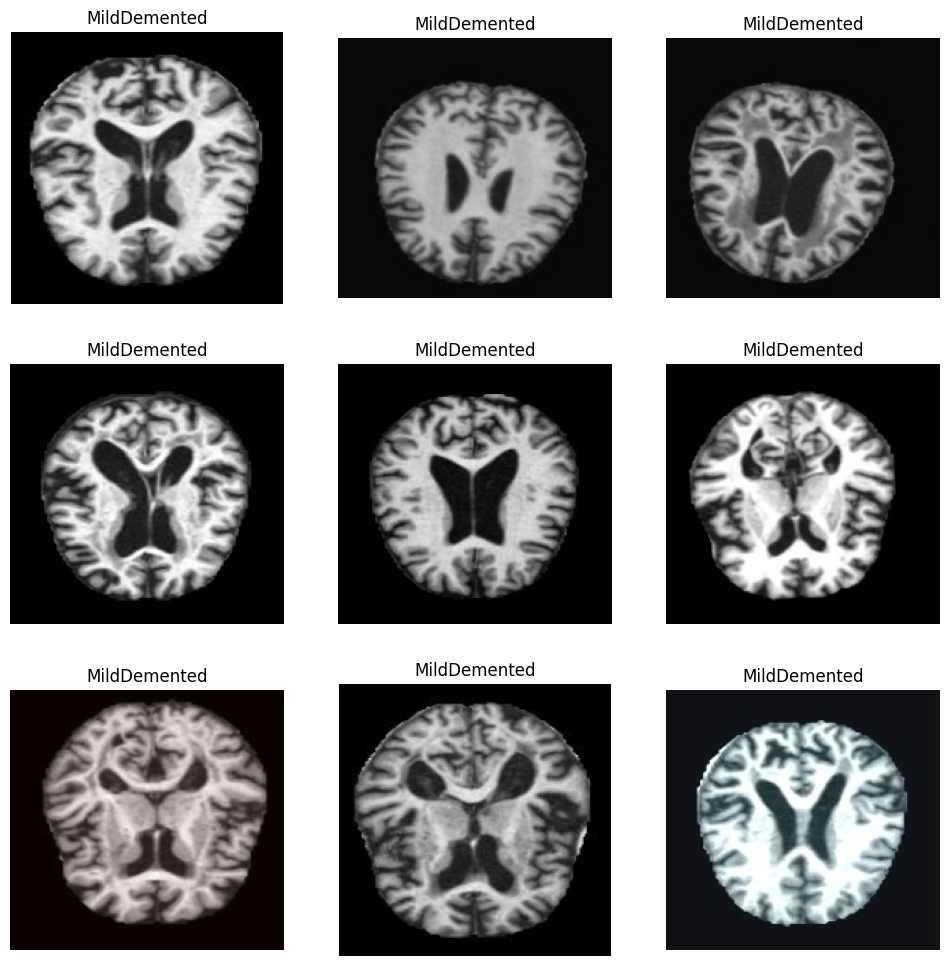

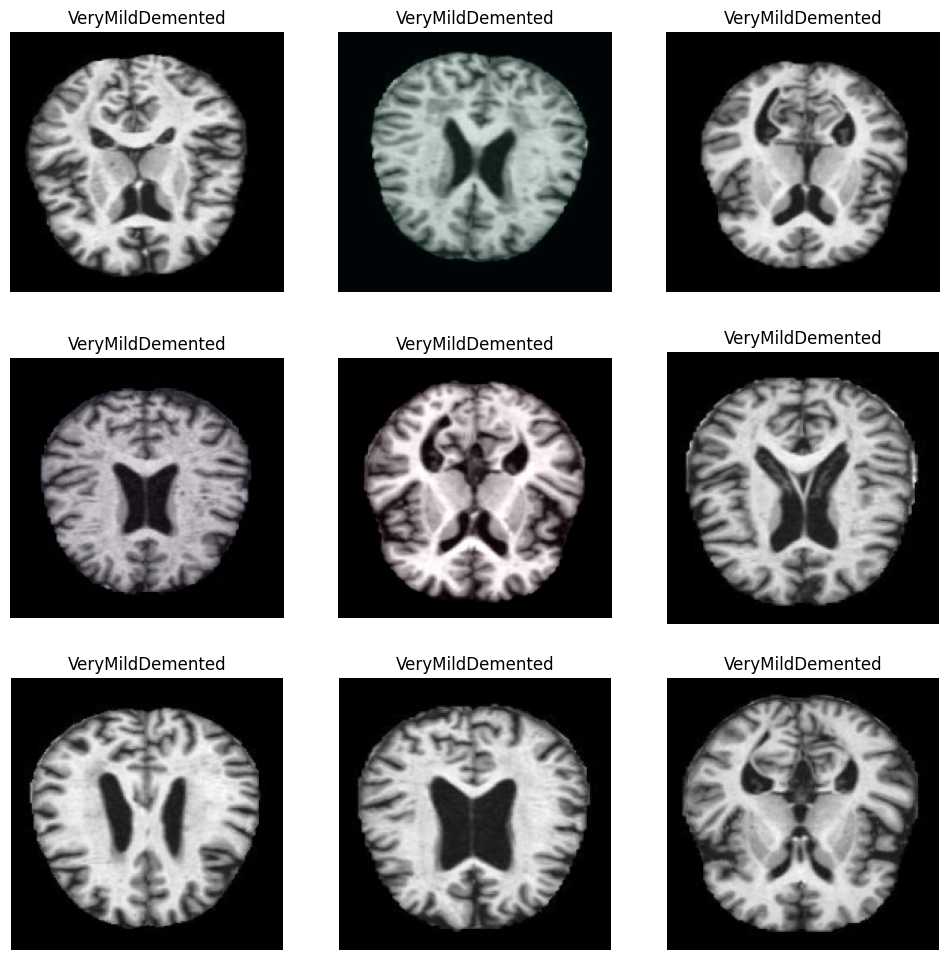

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

def show_image_grid(directory, class_name, grid_size=(3, 3)):
    class_folder = os.path.join(directory, class_name)
    image_files = os.listdir(class_folder)
    random_images = random.sample(image_files, grid_size[0] * grid_size[1])

    plt.figure(figsize=(12, 12))
    for i, img_file in enumerate(random_images):
        img_path = os.path.join(class_folder, img_file)
        img = Image.open(img_path)
        plt.subplot(grid_size[0], grid_size[1], i+1)
        plt.imshow(img)
        plt.title(f'{class_name}')
        plt.axis('off')
    plt.show()

# Show image grid for each class
for class_name in os.listdir(train_dir):
    show_image_grid(train_dir, class_name)

VGG16 CNN Architecture

In [ ]:
import os
import shutil
import random

# Function to sample a smaller subset of images based on availability
def sample_subset(input_dir, output_dir, num_samples):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for class_name in os.listdir(input_dir):
        class_dir = os.path.join(input_dir, class_name)
        if os.path.isdir(class_dir):
            os.makedirs(os.path.join(output_dir, class_name), exist_ok=True)
            available_images = os.listdir(class_dir)

            # Determine how many images to sample (either num_samples or available)
            num_to_sample = min(num_samples, len(available_images))

            # Randomly sample images
            sampled_images = random.sample(available_images, num_to_sample)
            for img in sampled_images:
                shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, class_name, img))

# Example usage: Sample images from training and validation sets
sample_subset(train_dir, 'train_subset_50', 200)
sample_subset(val_dir, 'val_subset_50', 100)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and normalization for the training set
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

# Normalization for the validation set
val_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators for the subset with 50 images per class
train_generator_subset_50 = train_datagen_augmented.flow_from_directory(
    'train_subset_50',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator_subset_50 = val_datagen.flow_from_directory(
    'val_subset_50',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 800 images belonging to 4 classes.
Found 364 images belonging to 4 classes.


3.1. VGG16 Training

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top layers
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base layers (optional)
for layer in base_model_vgg16.layers:
    layer.trainable = False

# Add custom layers
x = base_model_vgg16.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(4, activation='softmax')(x)  # 4 output classes

# Create the VGG16 model
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=output)

# Compile the model
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the VGG16 model
history_vgg16 = model_vgg16.fit(
    train_generator_subset_50,
    steps_per_epoch=train_generator_subset_50.samples // train_generator_subset_50.batch_size,
    validation_data=val_generator_subset_50,
    validation_steps=val_generator_subset_50.samples // val_generator_subset_50.batch_size,
    epochs=10,  # Fewer epochs due to small dataset
    verbose=1
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 802s 32s/step - accuracy: 0.2609 - loss: 1.4981 - val_accuracy: 0.2898 - val_loss: 1.3821
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 364ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4167 - val_loss: 1.3216
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 844s 32s/step - accuracy: 0.2495 - loss: 1.3915 - val_accuracy: 0.3153 - val_loss: 1.3771
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 268ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.3588
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 777s 31s/step - accuracy: 0.3169 - loss: 1.3780 - val_accuracy: 0.3267 - val_loss: 1.3717
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 272ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5833 - val_loss: 1.3573
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 776s 31s/step - accuracy: 0.3390 - loss: 1.3730 - val_accuracy: 0.3835 - val_loss: 1.3639
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 321ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3333 - val_loss: 1.3595
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 800s 32s/step - accuracy: 0.3357 - loss: 1.37

3.2. ResNet Training

In [ ]:
from tensorflow.keras.applications import ResNet50

# Load the pre-trained ResNet model without the top layers
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base layers (optional)
for layer in base_model_resnet.layers:
    layer.trainable = False

# Add custom layers
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(4, activation='softmax')(x)  # 4 output classes

# Create the ResNet model
model_resnet = Model(inputs=base_model_resnet.input, outputs=output)

# Compile the model
model_resnet.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the ResNet model
history_resnet = model_resnet.fit(
    train_generator_subset_50,
    steps_per_epoch=train_generator_subset_50.samples // train_generator_subset_50.batch_size,
    validation_data=val_generator_subset_50,
    validation_steps=val_generator_subset_50.samples // val_generator_subset_50.batch_size,
    epochs=10,  # Fewer epochs due to small dataset
    verbose=1
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 258s 10s/step - accuracy: 0.2352 - loss: 1.4888 - val_accuracy: 0.2699 - val_loss: 1.4027
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0833 - val_loss: 1.4767
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 252s 10s/step - accuracy: 0.2524 - loss: 1.3988 - val_accuracy: 0.2585 - val_loss: 1.3763
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 479ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0833 - val_loss: 1.3943
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 240s 10s/step - accuracy: 0.2510 - loss: 1.3894 - val_accuracy: 0.2898 - val_loss: 1.3859
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 579ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4167 - val_loss: 1.3684
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 241s 10s/step - accuracy: 0.2788 - loss: 1.3835 - val_accuracy: 0.2727 - val_loss: 1.3915
Epoch 8/10
25/25 ━━━━━━━━━━

Feature Extraction for SVM and Random Forest

In [ ]:
# Extract features using VGG16 without the top layers
def extract_features(generator, model):
    features = model.predict(generator, steps=generator.samples // generator.batch_size)
    return features

# Extract features from the training and validation sets
train_features = extract_features(train_generator_subset_50, base_model_vgg16)
val_features = extract_features(val_generator_subset_50, base_model_vgg16)

# Flatten the features
train_features = train_features.reshape(train_features.shape[0], -1)
val_features = val_features.reshape(val_features.shape[0], -1)

# Encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_generator_subset_50.classes)
val_labels = label_encoder.transform(val_generator_subset_50.classes)

25/25 ━━━━━━━━━━━━━━━━━━━━ 540s 22s/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 233s 21s/step


In [ ]:
# Check the shapes of train_features and train_labels
print(f'Train Features Shape: {train_features.shape}')
print(f'Train Labels Shape: {train_labels.shape}')

Train Features Shape: (800, 25088)
Train Labels Shape: (800,)


In [ ]:
# Check the number of samples in the generator
print(f'Number of training samples: {train_generator_subset_50.samples}')
print(f'Number of validation samples: {val_generator_subset_50.samples}')

Number of training samples: 800
Number of validation samples: 364


In [ ]:
# Calculate steps per epoch based on total samples and batch size
steps_per_epoch_train = (train_generator_subset_50.samples + train_generator_subset_50.batch_size - 1) // train_generator_subset_50.batch_size
steps_per_epoch_val = (val_generator_subset_50.samples + val_generator_subset_50.batch_size - 1) // val_generator_subset_50.batch_size

# Extract features again using correct steps_per_epoch
train_features = base_model_vgg16.predict(train_generator_subset_50, steps=steps_per_epoch_train, verbose=1)
val_features = base_model_vgg16.predict(val_generator_subset_50, steps=steps_per_epoch_val, verbose=1)

# Check the feature shapes after correction
print(f'Train Features Shape: {train_features.shape}')
print(f'Validation Features Shape: {val_features.shape}')


25/25 ━━━━━━━━━━━━━━━━━━━━ 554s 22s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 248s 20s/step
Train Features Shape: (800, 7, 7, 512)
Validation Features Shape: (364, 7, 7, 512)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
train_labels = label_encoder.fit_transform(train_generator_subset_50.classes)
val_labels = label_encoder.transform(val_generator_subset_50.classes)

# Check the shapes of features and labels
print(f'Final Train Features Shape: {train_features.shape}')
print(f'Final Train Labels Shape: {train_labels.shape}')

Final Train Features Shape: (800, 7, 7, 512)
Final Train Labels Shape: (800,)


In [ ]:
# Example: Flatten 4D features (samples, height, width, channels) into 2D (samples, features)
train_features = train_features.reshape(train_features.shape[0], -1)
val_features = val_features.reshape(val_features.shape[0], -1)

# Check the flattened feature shapes
print(f'Train Features Shape: {train_features.shape}')  # Should now be (samples, features)
print(f'Validation Features Shape: {val_features.shape}')

Train Features Shape: (800, 25088)
Validation Features Shape: (364, 25088)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train the SVM model
svm_model = SVC(kernel='rbf', gamma='scale')
svm_model.fit(train_features, train_labels)

# Predict on the validation set
val_predictions_svm = svm_model.predict(val_features)

# Calculate accuracy
svm_accuracy = accuracy_score(val_labels, val_predictions_svm)
print(f'SVM Validation Accuracy: {svm_accuracy:.4f}')

SVM Validation Accuracy: 0.2775


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10)
rf_model.fit(train_features, train_labels)

# Predict on the validation set
val_predictions_rf = rf_model.predict(val_features)

# Calculate accuracy
rf_accuracy = accuracy_score(val_labels, val_predictions_rf)
print(f'Random Forest Validation Accuracy: {rf_accuracy:.4f}')

Random Forest Validation Accuracy: 0.2747


SVM Validation Accuracy: 0.2775

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.50      0.36       100
           1       0.43      0.05      0.08        64
           2       0.27      0.03      0.05       100
           3       0.26      0.45      0.33       100

    accuracy                           0.28       364
   macro avg       0.31      0.26      0.21       364
weighted avg       0.30      0.28      0.22       364


Confusion Matrix:
[[50  2  1 47]
 [36  3  5 20]
 [36  1  3 60]
 [52  1  2 45]]


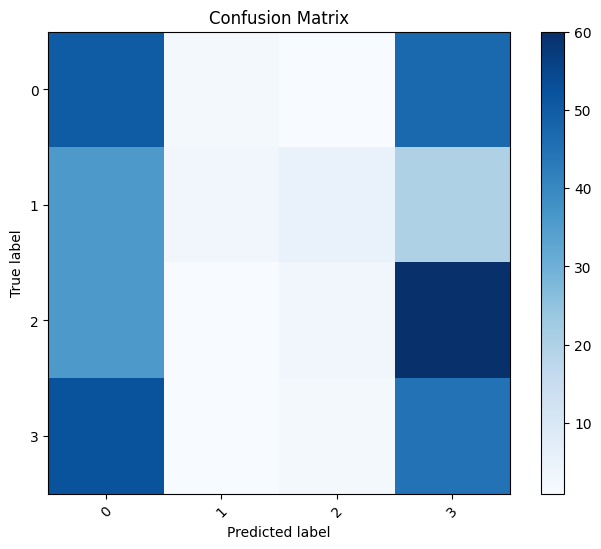

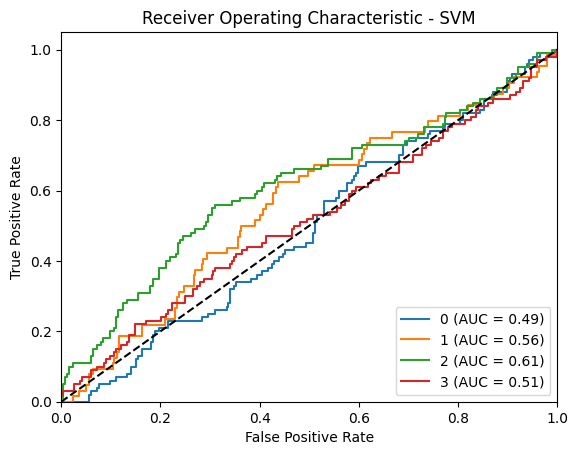

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelBinarizer

# Train the SVM model
svm_model = SVC(kernel='rbf', gamma='scale', probability=True)  # Set probability=True for AUC-ROC
svm_model.fit(train_features, train_labels)

# Predict on the validation set
val_predictions_svm = svm_model.predict(val_features)

# Calculate accuracy
svm_accuracy = accuracy_score(val_labels, val_predictions_svm)
print(f'SVM Validation Accuracy: {svm_accuracy:.4f}')

# Classification Report
print("\nClassification Report:")
print(classification_report(val_labels, val_predictions_svm))

# Confusion Matrix
confusion_mtx = confusion_matrix(val_labels, val_predictions_svm)
print("\nConfusion Matrix:")
print(confusion_mtx)

# Plot confusion matrix
plt.figure(figsize=(8,6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(4), label_encoder.classes_, rotation=45)
plt.yticks(np.arange(4), label_encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# AUC-ROC Curve (multi-class)
# Convert labels to one-hot encoding
lb = LabelBinarizer()
val_labels_binarized = lb.fit_transform(val_labels)

# Predict probabilities for ROC-AUC
val_probabilities = svm_model.predict_proba(val_features)

# Calculate ROC for each class
for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(val_labels_binarized[:, i], val_probabilities[:, i])
    roc_auc = roc_auc_score(val_labels_binarized[:, i], val_probabilities[:, i])

    # Plot each AUC-ROC curve
    plt.plot(fpr, tpr, label=f'{label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic - SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Random Forest Validation Accuracy: 0.2720

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.40      0.33       100
           1       0.25      0.14      0.18        64
           2       0.29      0.23      0.26       100
           3       0.26      0.27      0.26       100

    accuracy                           0.27       364
   macro avg       0.27      0.26      0.26       364
weighted avg       0.27      0.27      0.26       364


Confusion Matrix:
[[40 13 21 26]
 [22  9 14 19]
 [39  6 23 32]
 [45  8 20 27]]


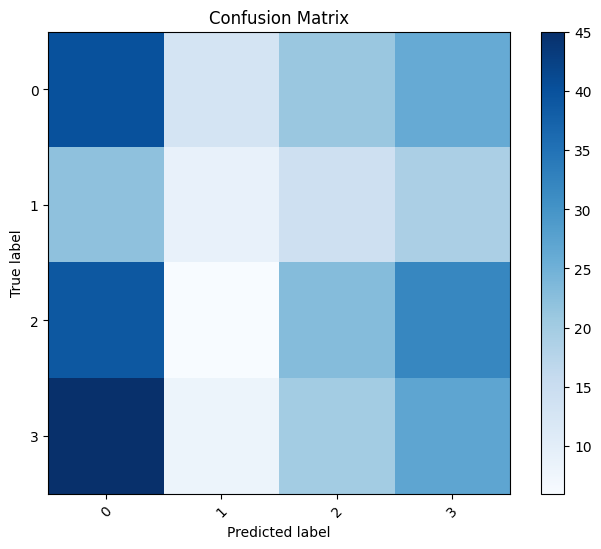

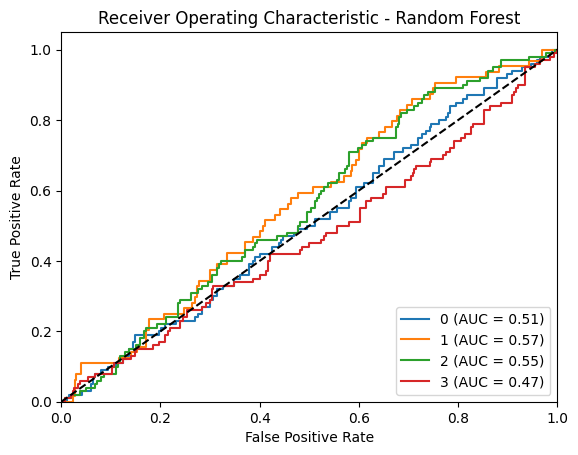

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelBinarizer

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(train_features, train_labels)

# Predict on the validation set
val_predictions_rf = rf_model.predict(val_features)

# Calculate accuracy
rf_accuracy = accuracy_score(val_labels, val_predictions_rf)
print(f'Random Forest Validation Accuracy: {rf_accuracy:.4f}')

# Classification Report
print("\nClassification Report:")
print(classification_report(val_labels, val_predictions_rf))

# Confusion Matrix
confusion_mtx = confusion_matrix(val_labels, val_predictions_rf)
print("\nConfusion Matrix:")
print(confusion_mtx)

# Plot confusion matrix
plt.figure(figsize=(8,6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(4), label_encoder.classes_, rotation=45)
plt.yticks(np.arange(4), label_encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# AUC-ROC Curve (multi-class)
# Convert labels to one-hot encoding
lb = LabelBinarizer()
val_labels_binarized = lb.fit_transform(val_labels)

# Predict probabilities for ROC-AUC
val_probabilities_rf = rf_model.predict_proba(val_features)

# Calculate ROC for each class
for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(val_labels_binarized[:, i], val_probabilities_rf[:, i])
    roc_auc = roc_auc_score(val_labels_binarized[:, i], val_probabilities_rf[:, i])

    # Plot each AUC-ROC curve
    plt.plot(fpr, tpr, label=f'{label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Logistic Regression Accuracy: 0.2253

Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.24      0.48      0.32       100
ModerateDemented       0.19      0.16      0.17        64
     NonDemented       0.15      0.06      0.09       100
VeryMildDemented       0.24      0.18      0.21       100

        accuracy                           0.23       364
       macro avg       0.21      0.22      0.20       364
    weighted avg       0.21      0.23      0.20       364


Confusion Matrix:
[[48 18 18 16]
 [27 10  7 20]
 [61 13  6 20]
 [61 12  9 18]]


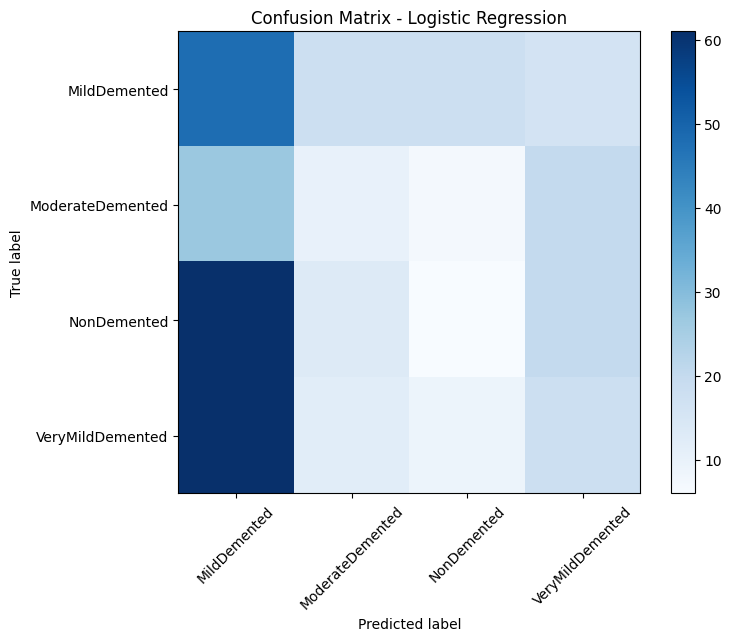

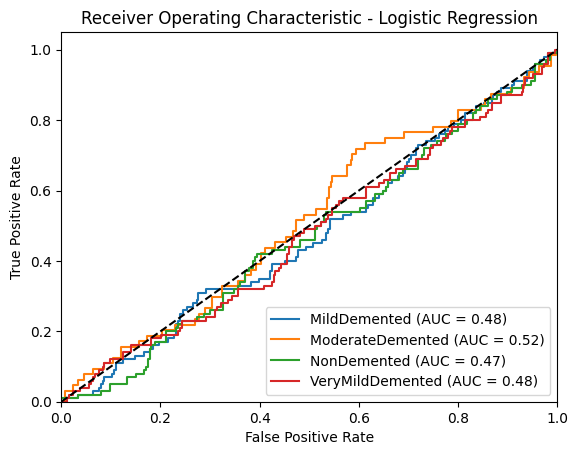

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelBinarizer

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(train_features, train_labels)

# Predict on the validation set
val_predictions_lr = lr_model.predict(val_features)

# Calculate accuracy
lr_accuracy = accuracy_score(val_labels, val_predictions_lr)
print(f'Logistic Regression Accuracy: {lr_accuracy:.4f}')

# Classification Report
print("\nClassification Report:")
print(classification_report(val_labels, val_predictions_lr, target_names=val_generator_subset_50.class_indices.keys()))

# Confusion Matrix
confusion_mtx_lr = confusion_matrix(val_labels, val_predictions_lr)
print("\nConfusion Matrix:")
print(confusion_mtx_lr)

# Plot confusion matrix
plt.figure(figsize=(8,6))
plt.imshow(confusion_mtx_lr, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.colorbar()
plt.xticks(np.arange(4), val_generator_subset_50.class_indices.keys(), rotation=45)
plt.yticks(np.arange(4), val_generator_subset_50.class_indices.keys())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# AUC-ROC Curve
lb = LabelBinarizer()
val_labels_binarized = lb.fit_transform(val_labels)

# Predict probabilities for ROC-AUC
val_probabilities_lr = lr_model.predict_proba(val_features)

# Plot ROC for each class
for i in range(len(val_generator_subset_50.class_indices)):
    fpr, tpr, _ = roc_curve(val_labels_binarized[:, i], val_probabilities_lr[:, i])
    roc_auc = roc_auc_score(val_labels_binarized[:, i], val_probabilities_lr[:, i])

    # Plot each AUC-ROC curve
    plt.plot(fpr, tpr, label=f'{list(val_generator_subset_50.class_indices.keys())[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

k-NN Accuracy: 0.2637

Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.26      0.62      0.37       100
ModerateDemented       0.19      0.08      0.11        64
     NonDemented       0.25      0.04      0.07       100
VeryMildDemented       0.30      0.25      0.27       100

        accuracy                           0.26       364
       macro avg       0.25      0.25      0.20       364
    weighted avg       0.26      0.26      0.21       364


Confusion Matrix:
[[62 11  6 21]
 [33  5  3 23]
 [81  1  4 14]
 [63  9  3 25]]


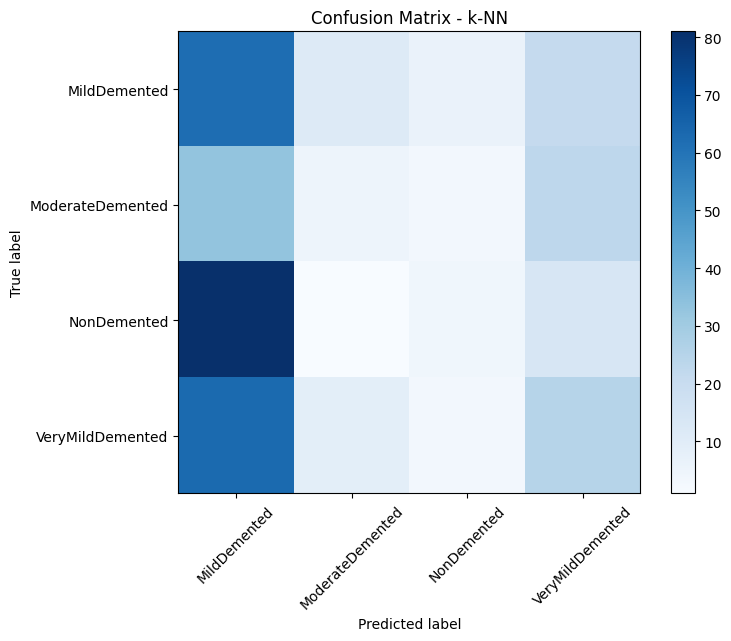

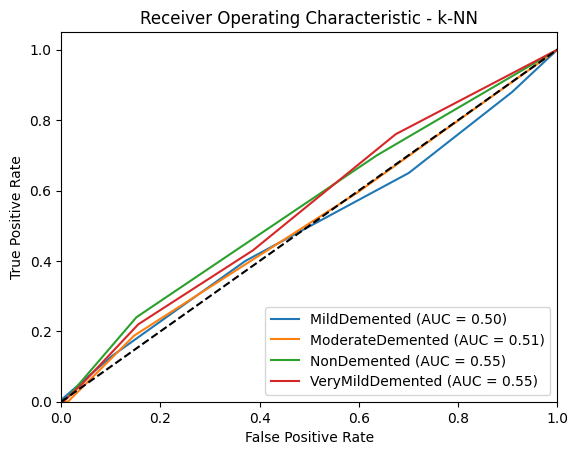

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_features, train_labels)

# Predict on the validation set
val_predictions_knn = knn_model.predict(val_features)

# Calculate accuracy
knn_accuracy = accuracy_score(val_labels, val_predictions_knn)
print(f'k-NN Accuracy: {knn_accuracy:.4f}')

# Classification Report
print("\nClassification Report:")
print(classification_report(val_labels, val_predictions_knn, target_names=val_generator_subset_50.class_indices.keys()))

# Confusion Matrix
confusion_mtx_knn = confusion_matrix(val_labels, val_predictions_knn)
print("\nConfusion Matrix:")
print(confusion_mtx_knn)

# Plot confusion matrix
plt.figure(figsize=(8,6))
plt.imshow(confusion_mtx_knn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - k-NN')
plt.colorbar()
plt.xticks(np.arange(4), val_generator_subset_50.class_indices.keys(), rotation=45)
plt.yticks(np.arange(4), val_generator_subset_50.class_indices.keys())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# AUC-ROC Curve
val_probabilities_knn = knn_model.predict_proba(val_features)

# Plot ROC for each class
for i in range(len(val_generator_subset_50.class_indices)):
    fpr, tpr, _ = roc_curve(val_labels_binarized[:, i], val_probabilities_knn[:, i])
    roc_auc = roc_auc_score(val_labels_binarized[:, i], val_probabilities_knn[:, i])

    # Plot each AUC-ROC curve
    plt.plot(fpr, tpr, label=f'{list(val_generator_subset_50.class_indices.keys())[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic - k-NN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## Hyperparameter Tuning

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Randomized Search took 105.92 seconds
Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}
Tuned Random Forest Validation Accuracy: 0.2747

Tuned Random Forest Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.30      0.61      0.41       100
ModerateDemented       0.14      0.05      0.07        64
     NonDemented       0.29      0.21      0.24       100
VeryMildDemented       0.21      0.15      0.18       100

        accuracy                           0.27       364
       macro avg       0.24      0.25      0.22       364
    weighted avg       0.25      0.27      0.24       364


Confusion Matrix for Tuned Random Forest:
[[61  5 20 14]
 [35  3 14 12]
 [44  5 21 30]
 [60  8 17 15]]


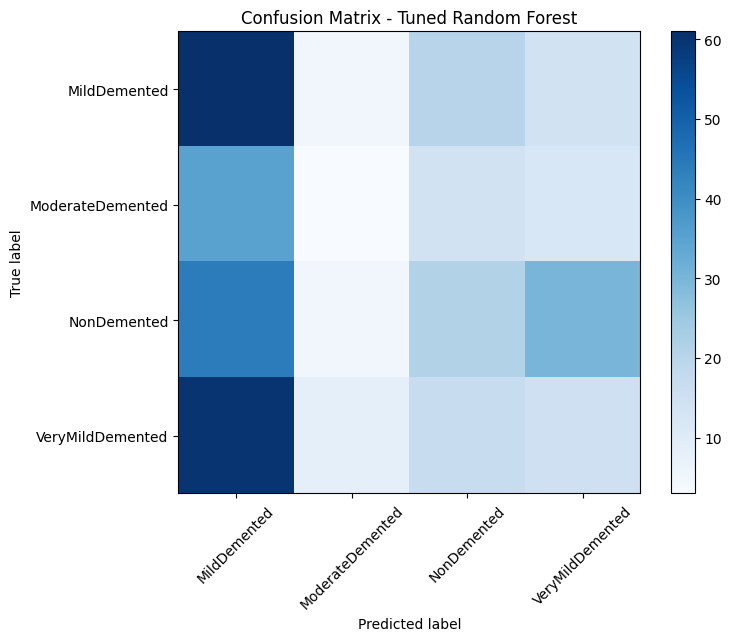

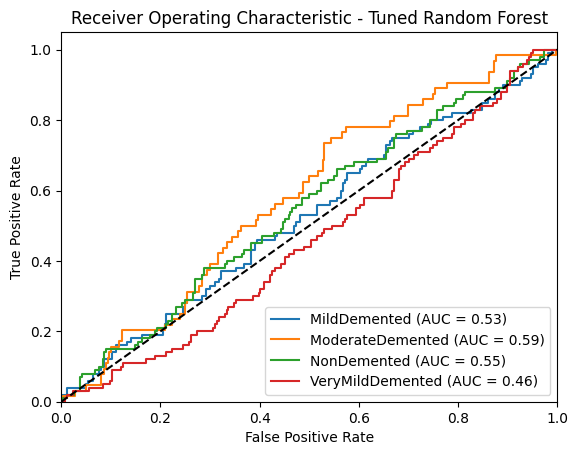

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import time

# Assuming train_features and val_features are already extracted
# Step 1: Scale the features
scaler = StandardScaler()

# Scale the training features
train_features_scaled = scaler.fit_transform(train_features)

# Scale the validation features
val_features_scaled = scaler.transform(val_features)

# Step 2: Define the parameter distribution for Randomized Search (fewer combinations)
param_dist_rf = {
    'n_estimators': [50, 100],            # Number of trees (keep smaller for speed)
    'max_depth': [10, 20, None],          # Maximum depth of the trees
    'min_samples_split': [2, 5],          # Minimum samples to split a node
    'min_samples_leaf': [1, 2],           # Minimum samples at leaf node
    'bootstrap': [True, False]            # Whether bootstrap samples are used when building trees
}

# Step 3: Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV instead of GridSearchCV for faster tuning
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist_rf,
    n_iter=10,  # Number of random combinations to try
    cv=3,       # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1   # Use all available cores
)

# Step 4: Start timing the process
start_time = time.time()

# Fit the model on training data
random_search_rf.fit(train_features_scaled, train_labels)

# Print total runtime
print(f"Randomized Search took {time.time() - start_time:.2f} seconds")

# Step 5: Get the best parameters and best estimator
best_rf_model = random_search_rf.best_estimator_
print(f"Best Parameters for Random Forest: {random_search_rf.best_params_}")

# Step 6: Predict on the validation set using the best Random Forest model
val_predictions_rf_tuned = best_rf_model.predict(val_features_scaled)

# Step 7: Calculate accuracy
rf_tuned_accuracy = accuracy_score(val_labels, val_predictions_rf_tuned)
print(f'Tuned Random Forest Validation Accuracy: {rf_tuned_accuracy:.4f}')

# Classification Report
print("\nTuned Random Forest Classification Report:")
print(classification_report(val_labels, val_predictions_rf_tuned, target_names=val_generator_subset_50.class_indices.keys()))

# Confusion Matrix
confusion_mtx_rf_tuned = confusion_matrix(val_labels, val_predictions_rf_tuned)
print("\nConfusion Matrix for Tuned Random Forest:")
print(confusion_mtx_rf_tuned)

# Step 8: Plot confusion matrix
plt.figure(figsize=(8,6))
plt.imshow(confusion_mtx_rf_tuned, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Tuned Random Forest')
plt.colorbar()
plt.xticks(np.arange(4), val_generator_subset_50.class_indices.keys(), rotation=45)
plt.yticks(np.arange(4), val_generator_subset_50.class_indices.keys())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Step 9: AUC-ROC Curve (multi-class)
lb = LabelBinarizer()
val_labels_binarized = lb.fit_transform(val_labels)

# Predict probabilities for ROC-AUC
val_probabilities_rf_tuned = best_rf_model.predict_proba(val_features_scaled)

# Plot ROC for each class
for i in range(len(val_generator_subset_50.class_indices)):
    fpr, tpr, _ = roc_curve(val_labels_binarized[:, i], val_probabilities_rf_tuned[:, i])
    roc_auc = roc_auc_score(val_labels_binarized[:, i], val_probabilities_rf_tuned[:, i])

    # Plot each AUC-ROC curve
    plt.plot(fpr, tpr, label=f'{list(val_generator_subset_50.class_indices.keys())[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic - Tuned Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Randomized Search took 1611.87 seconds
Best Parameters for SVM: {'kernel': 'linear', 'gamma': 0.001, 'C': 1}
Tuned SVM Validation Accuracy: 0.2610

Tuned SVM Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.29      0.60      0.39       100
ModerateDemented       0.16      0.11      0.13        64
     NonDemented       0.21      0.07      0.11       100
VeryMildDemented       0.26      0.21      0.23       100

        accuracy                           0.26       364
       macro avg       0.23      0.25      0.21       364
    weighted avg       0.24      0.26      0.22       364


Confusion Matrix for Tuned SVM:
[[60 12 12 16]
 [30  7  4 23]
 [59 12  7 22]
 [57 12 10 21]]


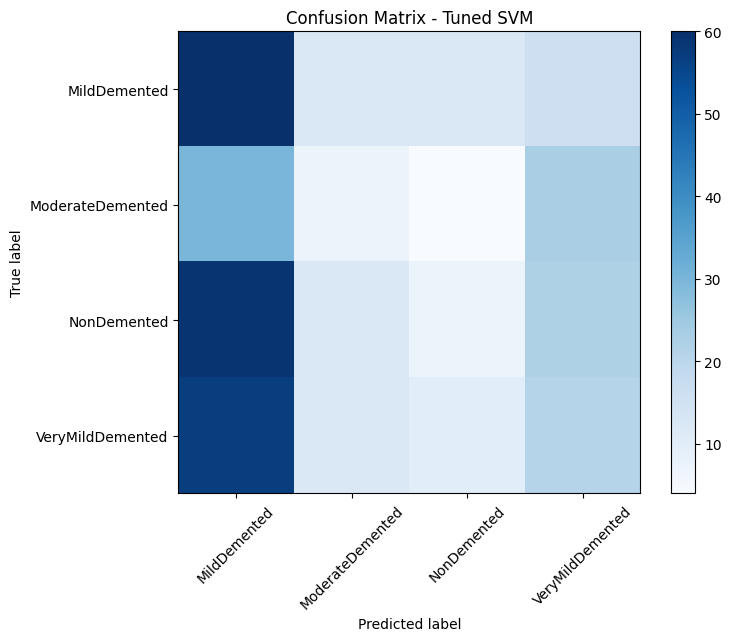

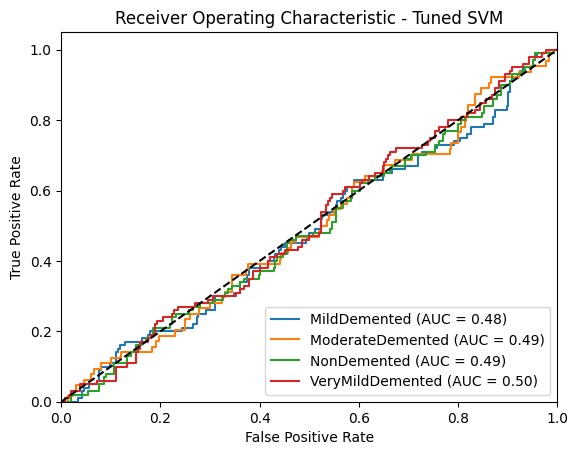

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import time

# Assuming train_features and val_features are already extracted
# Step 1: Scale the features
scaler = StandardScaler()

# Scale the training features
train_features_scaled = scaler.fit_transform(train_features)

# Scale the validation features
val_features_scaled = scaler.transform(val_features)

# Step 2: Define the parameter distribution for Randomized Search
param_dist_svm = {
    'C': [0.1, 1, 10, 100],             # Regularization parameter
    'gamma': ['scale', 0.001, 0.01],    # Kernel coefficient
    'kernel': ['linear', 'rbf']         # Kernel type
}

# Step 3: Initialize SVM model
svm_model = SVC(probability=True, random_state=42)

# Use RandomizedSearchCV instead of GridSearchCV for faster tuning
random_search_svm = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_dist_svm,
    n_iter=10,  # Number of random combinations to try
    cv=3,       # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1   # Use all available cores
)

# Step 4: Start timing the process
start_time = time.time()

# Fit the model on training data
random_search_svm.fit(train_features_scaled, train_labels)

# Print total runtime
print(f"Randomized Search took {time.time() - start_time:.2f} seconds")

# Step 5: Get the best parameters and best estimator
best_svm_model = random_search_svm.best_estimator_
print(f"Best Parameters for SVM: {random_search_svm.best_params_}")

# Step 6: Predict on the validation set using the best SVM model
val_predictions_svm_tuned = best_svm_model.predict(val_features_scaled)

# Step 7: Calculate accuracy
svm_tuned_accuracy = accuracy_score(val_labels, val_predictions_svm_tuned)
print(f'Tuned SVM Validation Accuracy: {svm_tuned_accuracy:.4f}')

# Classification Report
print("\nTuned SVM Classification Report:")
print(classification_report(val_labels, val_predictions_svm_tuned, target_names=val_generator_subset_50.class_indices.keys()))

# Confusion Matrix
confusion_mtx_svm_tuned = confusion_matrix(val_labels, val_predictions_svm_tuned)
print("\nConfusion Matrix for Tuned SVM:")
print(confusion_mtx_svm_tuned)

# Step 8: Plot confusion matrix
plt.figure(figsize=(8,6))
plt.imshow(confusion_mtx_svm_tuned, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Tuned SVM')
plt.colorbar()
plt.xticks(np.arange(4), val_generator_subset_50.class_indices.keys(), rotation=45)
plt.yticks(np.arange(4), val_generator_subset_50.class_indices.keys())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Step 9: AUC-ROC Curve (multi-class)
lb = LabelBinarizer()
val_labels_binarized = lb.fit_transform(val_labels)

# Predict probabilities for ROC-AUC
val_probabilities_svm_tuned = best_svm_model.predict_proba(val_features_scaled)

# Plot ROC for each class
for i in range(len(val_generator_subset_50.class_indices)):
    fpr, tpr, _ = roc_curve(val_labels_binarized[:, i], val_probabilities_svm_tuned[:, i])
    roc_auc = roc_auc_score(val_labels_binarized[:, i], val_probabilities_svm_tuned[:, i])

    # Plot each AUC-ROC curve
    plt.plot(fpr, tpr, label=f'{list(val_generator_subset_50.class_indices.keys())[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic - Tuned SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)

# Assuming you have train_features and train_labels ready
# Apply SMOTE only to the training data
train_features_balanced, train_labels_balanced = smote.fit_resample(train_features, train_labels)

# Scale the balanced training features
scaler = StandardScaler()

# Scale the training features
train_features_scaled = scaler.fit_transform(train_features_balanced)

# Scale the validation features (without applying SMOTE on validation data)
val_features_scaled = scaler.transform(val_features)

## Class Balancing and Model Classsification Prediction

SVM Validation Accuracy (Balanced): 0.3049

Classification Report (Balanced):
              precision    recall  f1-score   support

           0       0.31      0.75      0.44       100
           1       0.38      0.09      0.15        64
           2       1.00      0.02      0.04       100
           3       0.27      0.28      0.28       100

    accuracy                           0.30       364
   macro avg       0.49      0.29      0.23       364
weighted avg       0.50      0.30      0.23       364


Confusion Matrix (Balanced):
[[75  5  0 20]
 [43  6  0 15]
 [54  4  2 40]
 [71  1  0 28]]


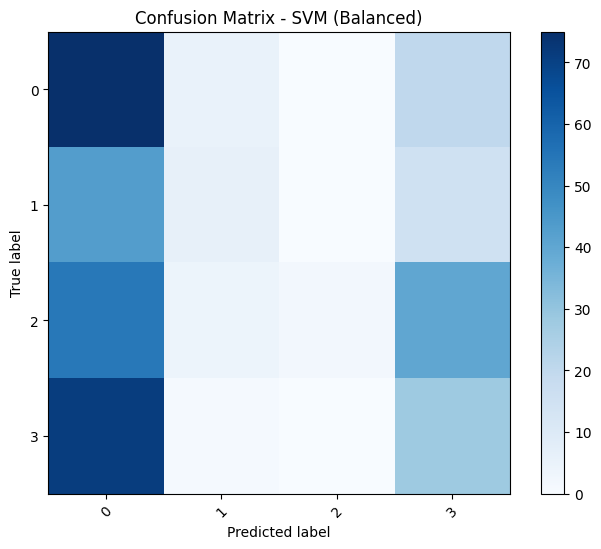

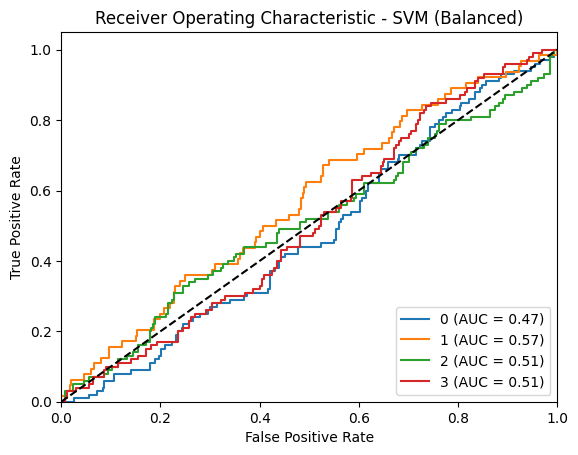

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
train_features_balanced, train_labels_balanced = smote.fit_resample(train_features, train_labels)

# Step 2: Scale the features
scaler = StandardScaler()

# Scale the balanced training features
train_features_scaled = scaler.fit_transform(train_features_balanced)

# Scale the validation features
val_features_scaled = scaler.transform(val_features)

# Step 3: Train the SVM model with the balanced dataset
svm_model = SVC(kernel='rbf', gamma='scale', probability=True, random_state=42)
svm_model.fit(train_features_scaled, train_labels_balanced)

# Step 4: Predict on the validation set
val_predictions_svm = svm_model.predict(val_features_scaled)

# Step 5: Calculate accuracy
svm_accuracy = accuracy_score(val_labels, val_predictions_svm)
print(f'SVM Validation Accuracy (Balanced): {svm_accuracy:.4f}')

# Step 6: Classification Report
print("\nClassification Report (Balanced):")
print(classification_report(val_labels, val_predictions_svm))

# Step 7: Confusion Matrix
confusion_mtx = confusion_matrix(val_labels, val_predictions_svm)
print("\nConfusion Matrix (Balanced):")
print(confusion_mtx)

# Plot confusion matrix
plt.figure(figsize=(8,6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVM (Balanced)')
plt.colorbar()
plt.xticks(np.arange(4), label_encoder.classes_, rotation=45)
plt.yticks(np.arange(4), label_encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Step 8: AUC-ROC Curve (multi-class)
lb = LabelBinarizer()
val_labels_binarized = lb.fit_transform(val_labels)

# Predict probabilities for ROC-AUC
val_probabilities = svm_model.predict_proba(val_features_scaled)

# Plot ROC for each class
for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(val_labels_binarized[:, i], val_probabilities[:, i])
    roc_auc = roc_auc_score(val_labels_binarized[:, i], val_probabilities[:, i])

    # Plot each AUC-ROC curve
    plt.plot(fpr, tpr, label=f'{label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic - SVM (Balanced)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Logistic Regression Validation Accuracy (Balanced): 0.2390

Classification Report (Balanced):
              precision    recall  f1-score   support

           0       0.28      0.53      0.36       100
           1       0.16      0.14      0.15        64
           2       0.17      0.07      0.10       100
           3       0.25      0.18      0.21       100

    accuracy                           0.24       364
   macro avg       0.21      0.23      0.20       364
weighted avg       0.22      0.24      0.21       364


Confusion Matrix (Balanced):
[[53 16 17 14]
 [29  9  5 21]
 [58 15  7 20]
 [52 17 13 18]]


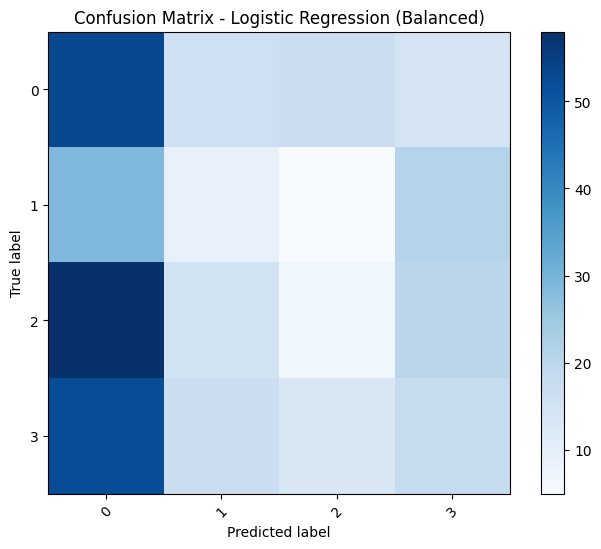

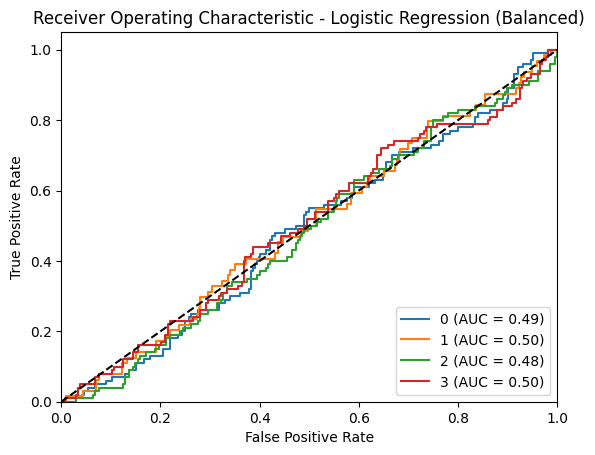

In [ ]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
train_features_balanced, train_labels_balanced = smote.fit_resample(train_features, train_labels)

# Step 2: Scale the features
scaler = StandardScaler()

# Scale the balanced training features
train_features_scaled = scaler.fit_transform(train_features_balanced)

# Scale the validation features
val_features_scaled = scaler.transform(val_features)

# Step 3: Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(train_features_scaled, train_labels_balanced)

# Step 4: Predict on the validation set
val_predictions_lr = lr_model.predict(val_features_scaled)

# Step 5: Calculate accuracy
lr_accuracy = accuracy_score(val_labels, val_predictions_lr)
print(f'Logistic Regression Validation Accuracy (Balanced): {lr_accuracy:.4f}')

# Step 6: Classification Report
print("\nClassification Report (Balanced):")
print(classification_report(val_labels, val_predictions_lr))

# Step 7: Confusion Matrix
confusion_mtx_lr = confusion_matrix(val_labels, val_predictions_lr)
print("\nConfusion Matrix (Balanced):")
print(confusion_mtx_lr)

# Plot confusion matrix
plt.figure(figsize=(8,6))
plt.imshow(confusion_mtx_lr, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression (Balanced)')
plt.colorbar()
plt.xticks(np.arange(4), label_encoder.classes_, rotation=45)
plt.yticks(np.arange(4), label_encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Step 8: AUC-ROC Curve (multi-class)
lb = LabelBinarizer()
val_labels_binarized = lb.fit_transform(val_labels)

# Predict probabilities for ROC-AUC
val_probabilities_lr = lr_model.predict_proba(val_features_scaled)

# Plot ROC for each class
for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(val_labels_binarized[:, i], val_probabilities_lr[:, i])
    roc_auc = roc_auc_score(val_labels_binarized[:, i], val_probabilities_lr[:, i])

    # Plot each AUC-ROC curve
    plt.plot(fpr, tpr, label=f'{label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic - Logistic Regression (Balanced)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Random Forest Validation Accuracy (Balanced): 0.2720

Classification Report (Balanced):
              precision    recall  f1-score   support

           0       0.27      0.40      0.33       100
           1       0.25      0.14      0.18        64
           2       0.29      0.23      0.26       100
           3       0.26      0.27      0.26       100

    accuracy                           0.27       364
   macro avg       0.27      0.26      0.26       364
weighted avg       0.27      0.27      0.26       364


Confusion Matrix (Balanced):
[[40 13 21 26]
 [22  9 14 19]
 [39  6 23 32]
 [45  8 20 27]]


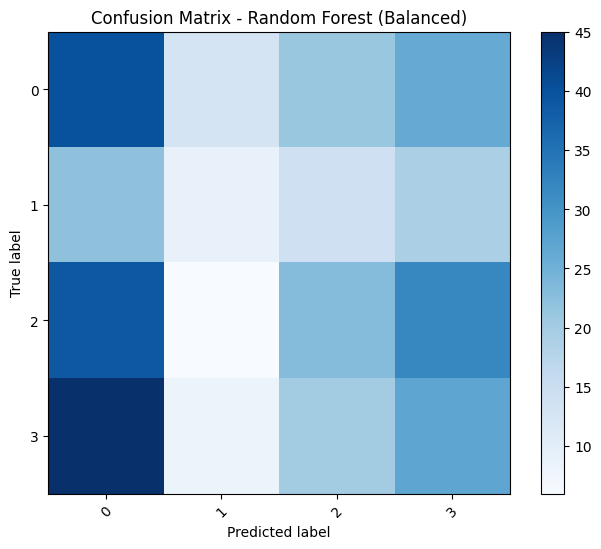

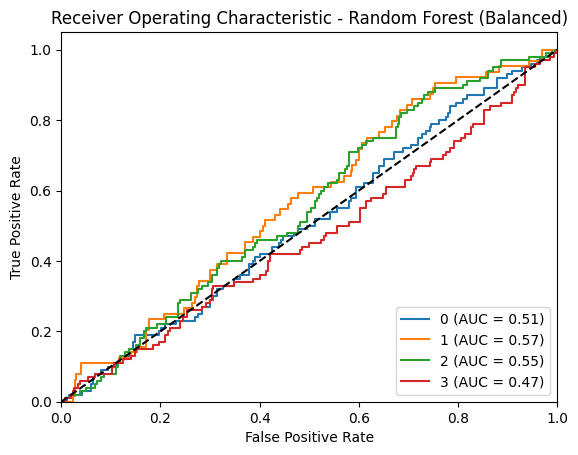

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
train_features_balanced, train_labels_balanced = smote.fit_resample(train_features, train_labels)

# Step 2: Scale the features
scaler = StandardScaler()

# Scale the balanced training features
train_features_scaled = scaler.fit_transform(train_features_balanced)

# Scale the validation features
val_features_scaled = scaler.transform(val_features)

# Step 3: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(train_features_scaled, train_labels_balanced)

# Step 4: Predict on the validation set
val_predictions_rf = rf_model.predict(val_features_scaled)

# Step 5: Calculate accuracy
rf_accuracy = accuracy_score(val_labels, val_predictions_rf)
print(f'Random Forest Validation Accuracy (Balanced): {rf_accuracy:.4f}')

# Step 6: Classification Report
print("\nClassification Report (Balanced):")
print(classification_report(val_labels, val_predictions_rf))

# Step 7: Confusion Matrix
confusion_mtx_rf = confusion_matrix(val_labels, val_predictions_rf)
print("\nConfusion Matrix (Balanced):")
print(confusion_mtx_rf)

# Plot confusion matrix
plt.figure(figsize=(8,6))
plt.imshow(confusion_mtx_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest (Balanced)')
plt.colorbar()
plt.xticks(np.arange(4), label_encoder.classes_, rotation=45)
plt.yticks(np.arange(4), label_encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Step 8: AUC-ROC Curve (multi-class)
lb = LabelBinarizer()
val_labels_binarized = lb.fit_transform(val_labels)

# Predict probabilities for ROC-AUC
val_probabilities_rf = rf_model.predict_proba(val_features_scaled)

# Plot ROC for each class
for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(val_labels_binarized[:, i], val_probabilities_rf[:, i])
    roc_auc = roc_auc_score(val_labels_binarized[:, i], val_probabilities_rf[:, i])

    # Plot each AUC-ROC curve
    plt.plot(fpr, tpr, label=f'{label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic - Random Forest (Balanced)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

k-NN Validation Accuracy (Balanced): 0.2940

Classification Report (Balanced):
              precision    recall  f1-score   support

           0       0.29      0.77      0.42       100
           1       0.28      0.08      0.12        64
           2       0.50      0.01      0.02       100
           3       0.32      0.24      0.27       100

    accuracy                           0.29       364
   macro avg       0.35      0.27      0.21       364
weighted avg       0.35      0.29      0.22       364


Confusion Matrix (Balanced):
[[77  3  0 20]
 [42  5  1 16]
 [80  3  1 16]
 [69  7  0 24]]


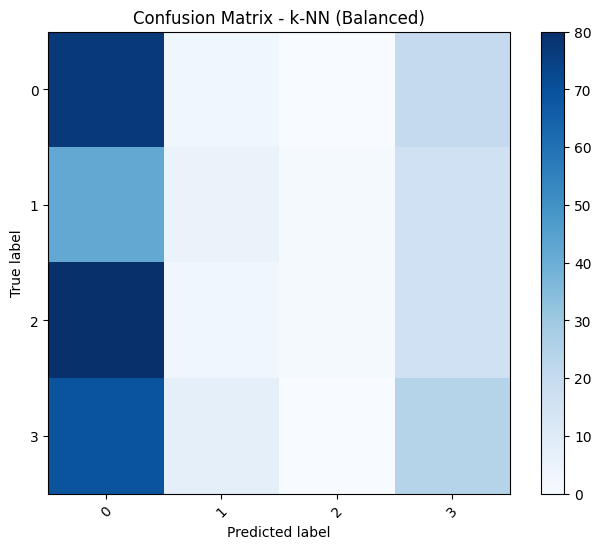

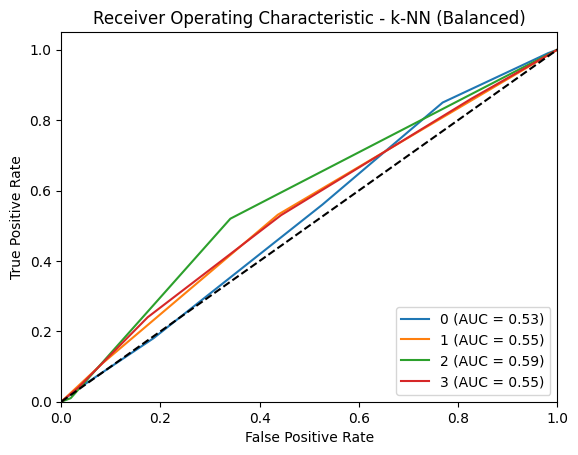

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
train_features_balanced, train_labels_balanced = smote.fit_resample(train_features, train_labels)

# Step 2: Scale the features
scaler = StandardScaler()

# Scale the balanced training features
train_features_scaled = scaler.fit_transform(train_features_balanced)

# Scale the validation features
val_features_scaled = scaler.transform(val_features)

# Step 3: Train the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_features_scaled, train_labels_balanced)

# Step 4: Predict on the validation set
val_predictions_knn = knn_model.predict(val_features_scaled)

# Step 5: Calculate accuracy
knn_accuracy = accuracy_score(val_labels, val_predictions_knn)
print(f'k-NN Validation Accuracy (Balanced): {knn_accuracy:.4f}')

# Step 6: Classification Report
print("\nClassification Report (Balanced):")
print(classification_report(val_labels, val_predictions_knn))

# Step 7: Confusion Matrix
confusion_mtx_knn = confusion_matrix(val_labels, val_predictions_knn)
print("\nConfusion Matrix (Balanced):")
print(confusion_mtx_knn)

# Plot confusion matrix
plt.figure(figsize=(8,6))
plt.imshow(confusion_mtx_knn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - k-NN (Balanced)')
plt.colorbar()
plt.xticks(np.arange(4), label_encoder.classes_, rotation=45)
plt.yticks(np.arange(4), label_encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Step 8: AUC-ROC Curve (multi-class)
lb = LabelBinarizer()
val_labels_binarized = lb.fit_transform(val_labels)

# Predict probabilities for ROC-AUC
val_probabilities_knn = knn_model.predict_proba(val_features_scaled)

# Plot ROC for each class
for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(val_labels_binarized[:, i], val_probabilities_knn[:, i])
    roc_auc = roc_auc_score(val_labels_binarized[:, i], val_probabilities_knn[:, i])

    # Plot each AUC-ROC curve
    plt.plot(fpr, tpr, label=f'{label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic - k-NN (Balanced)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
